In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [3]:
dfa = pd.read_excel("earthquake_data.xlsx")

In [4]:
dfa

,id,flag_tsunami,year,month,day,hour,minute,second,focal_depth,eq_primary,...,longitude,region_code,injuries,injuries_description,damage_millions_dollars,damage_description,total_injuries,total_injuries_description,total_damage_millions_dollars,total_damage_description
0,338,No,1048,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,771,Tsu,1580,4.0,6.0,NaN,NaN,NaN,33.0,6.2,...,1.309,120,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
2,7889,Tsu,1757,7.0,15.0,NaN,NaN,NaN,NaN,NaN,...,-6.320,120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6697,Tsu,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6013,Tsu,1668,4.0,13.0,NaN,NaN,NaN,NaN,NaN,...,-71.050,150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6067,5360,Tsu,1993,8.0,8.0,8.0,34.0,24.9,59.0,7.8,...,144.801,170,48.0,1.0,250.0,4.0,48.0,1.0,250.0,4.0
6068,5009,No,1983,12.0,22.0,1.0,2.0,2.4,26.0,6.4,...,151.868,170,NaN,NaN,25.0,4.0,NaN,NaN,25.0,4.0
6069,10307,No,2018,2.0,25.0,17.0,44.0,43.0,23.0,7.5,...,142.768,170,300.0,3.0,61.0,4.0,300.0,3.0,61.0,4.0
6070,5498,No,1998,7.0,9.0,5.0,19.0,7.3,10.0,6.2,...,-28.626,130,100.0,2.0,72.0,4.0,100.0,2.0,72.0,4.0


In [5]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6072 entries, 0 to 6071
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             6072 non-null   int64  
 1   flag_tsunami                   6072 non-null   object 
 2   year                           6072 non-null   int64  
 3   month                          5667 non-null   float64
 4   day                            5515 non-null   float64
 5   hour                           4044 non-null   float64
 6   minute                         3838 non-null   float64
 7   second                         2721 non-null   float64
 8   focal_depth                    3120 non-null   float64
 9   eq_primary                     4286 non-null   float64
 10  eq_mag_mw                      1216 non-null   float64
 11  eq_mag_ms                      2916 non-null   float64
 12  eq_mag_mb                      1786 non-null   f

In [6]:
dfa.describe()

,id,year,month,day,hour,minute,second,focal_depth,eq_primary,eq_mag_mw,...,longitude,region_code,injuries,injuries_description,damage_millions_dollars,damage_description,total_injuries,total_injuries_description,total_damage_millions_dollars,total_damage_description
count,6072.000000,6072.000000,5667.000000,5515.000000,4044.000000,3838.000000,2721.000000,3120.000000,4286.000000,1216.000000,...,6022.000000,6072.000000,1169.000000,1349.000000,478.000000,4327.000000,1184.000000,1357.000000,418.000000,3148.000000
mean,4658.426219,1802.307477,6.510852,15.734361,11.308605,28.855915,29.740243,41.680769,6.471419,6.526563,...,37.985633,109.844368,2293.579127,1.975537,1715.606259,2.263693,2510.967061,1.973471,1978.743206,2.193139
std,2924.650010,377.924931,3.450167,8.752862,7.033485,17.151545,17.132196,71.258782,1.043968,0.937869,...,86.726852,53.963219,27095.202227,1.084074,12157.409978,0.956053,28273.298405,1.082526,12988.187606,1.041035
min,1.000000,-2150.000000,1.000000,1.000000,0.000000,0.000000,0.100000,0.000000,1.600000,3.600000,...,-179.984000,10.000000,1.000000,1.000000,0.013000,1.000000,1.000000,1.000000,0.010000,1.000000
25%,2142.750000,1818.000000,4.000000,8.000000,5.000000,14.000000,14.800000,11.000000,5.700000,5.800000,...,-8.000000,50.000000,10.000000,1.000000,3.625000,1.000000,10.000000,1.000000,4.310000,1.000000
50%,4608.500000,1927.000000,7.000000,16.000000,11.000000,30.000000,29.700000,26.000000,6.500000,6.500000,...,43.300000,130.000000,42.000000,2.000000,20.900000,2.000000,42.500000,2.000000,28.000000,2.000000
75%,6475.250000,1986.000000,9.000000,23.000000,17.000000,44.000000,44.500000,40.000000,7.300000,7.200000,...,115.500000,160.000000,200.000000,3.000000,204.350000,3.000000,200.000000,3.000000,300.000000,3.000000
max,10378.000000,2018.000000,12.000000,31.000000,23.000000,59.000000,59.900000,675.000000,9.500000,9.500000,...,180.000000,170.000000,799000.000000,4.000000,220000.000000,4.000000,799000.000000,4.000000,220085.456000,4.000000


In [19]:
dfa.describe().T

,count,mean,std,min,25%,50%,75%,max
id,6072.0,4658.426219,2924.650010,1.000,2142.75000,4608.5,6475.25000,10378.000
year,6072.0,1802.307477,377.924931,-2150.000,1818.00000,1927.0,1986.00000,2018.000
month,5667.0,6.510852,3.450167,1.000,4.00000,7.0,9.00000,12.000
day,5515.0,15.734361,8.752862,1.000,8.00000,16.0,23.00000,31.000
hour,4044.0,11.308605,7.033485,0.000,5.00000,11.0,17.00000,23.000
minute,3838.0,28.855915,17.151545,0.000,14.00000,30.0,44.00000,59.000
second,2721.0,29.740243,17.132196,0.100,14.80000,29.7,44.50000,59.900
focal_depth,3120.0,41.680769,71.258782,0.000,11.00000,26.0,40.00000,675.000
eq_primary,4286.0,6.471419,1.043968,1.600,5.70000,6.5,7.30000,9.500
eq_mag_mw,1216.0,6.526563,0.937869,3.600,5.80000,6.5,7.20000,9.500


In [7]:
dfa

,id,flag_tsunami,year,month,day,hour,minute,second,focal_depth,eq_primary,...,longitude,region_code,injuries,injuries_description,damage_millions_dollars,damage_description,total_injuries,total_injuries_description,total_damage_millions_dollars,total_damage_description
0,338,No,1048,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,771,Tsu,1580,4.0,6.0,NaN,NaN,NaN,33.0,6.2,...,1.309,120,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
2,7889,Tsu,1757,7.0,15.0,NaN,NaN,NaN,NaN,NaN,...,-6.320,120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6697,Tsu,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6013,Tsu,1668,4.0,13.0,NaN,NaN,NaN,NaN,NaN,...,-71.050,150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6067,5360,Tsu,1993,8.0,8.0,8.0,34.0,24.9,59.0,7.8,...,144.801,170,48.0,1.0,250.0,4.0,48.0,1.0,250.0,4.0
6068,5009,No,1983,12.0,22.0,1.0,2.0,2.4,26.0,6.4,...,151.868,170,NaN,NaN,25.0,4.0,NaN,NaN,25.0,4.0
6069,10307,No,2018,2.0,25.0,17.0,44.0,43.0,23.0,7.5,...,142.768,170,300.0,3.0,61.0,4.0,300.0,3.0,61.0,4.0
6070,5498,No,1998,7.0,9.0,5.0,19.0,7.3,10.0,6.2,...,-28.626,130,100.0,2.0,72.0,4.0,100.0,2.0,72.0,4.0


In [8]:
dfa.isna().sum()

id                                  0
flag_tsunami                        0
year                                0
month                             405
day                               557
hour                             2028
minute                           2234
second                           3351
focal_depth                      2952
eq_primary                       1786
eq_mag_mw                        4856
eq_mag_ms                        3156
eq_mag_mb                        4286
intensity                        3324
country                             0
state                            5764
location_name                       1
latitude                           54
longitude                          50
region_code                         0
injuries                         4903
injuries_description             4723
damage_millions_dollars          5594
damage_description               1745
total_injuries                   4888
total_injuries_description       4715
total_damage

In [9]:
list(dfa.columns)

['id',
 'flag_tsunami',
 'year',
 'month',
 'day',
 'hour',
 'minute',
 'second',
 'focal_depth',
 'eq_primary',
 'eq_mag_mw',
 'eq_mag_ms',
 'eq_mag_mb',
 'intensity',
 'country',
 'state',
 'location_name',
 'latitude',
 'longitude',
 'region_code',
 'injuries',
 'injuries_description',
 'damage_millions_dollars',
 'damage_description',
 'total_injuries',
 'total_injuries_description',
 'total_damage_millions_dollars',
 'total_damage_description']

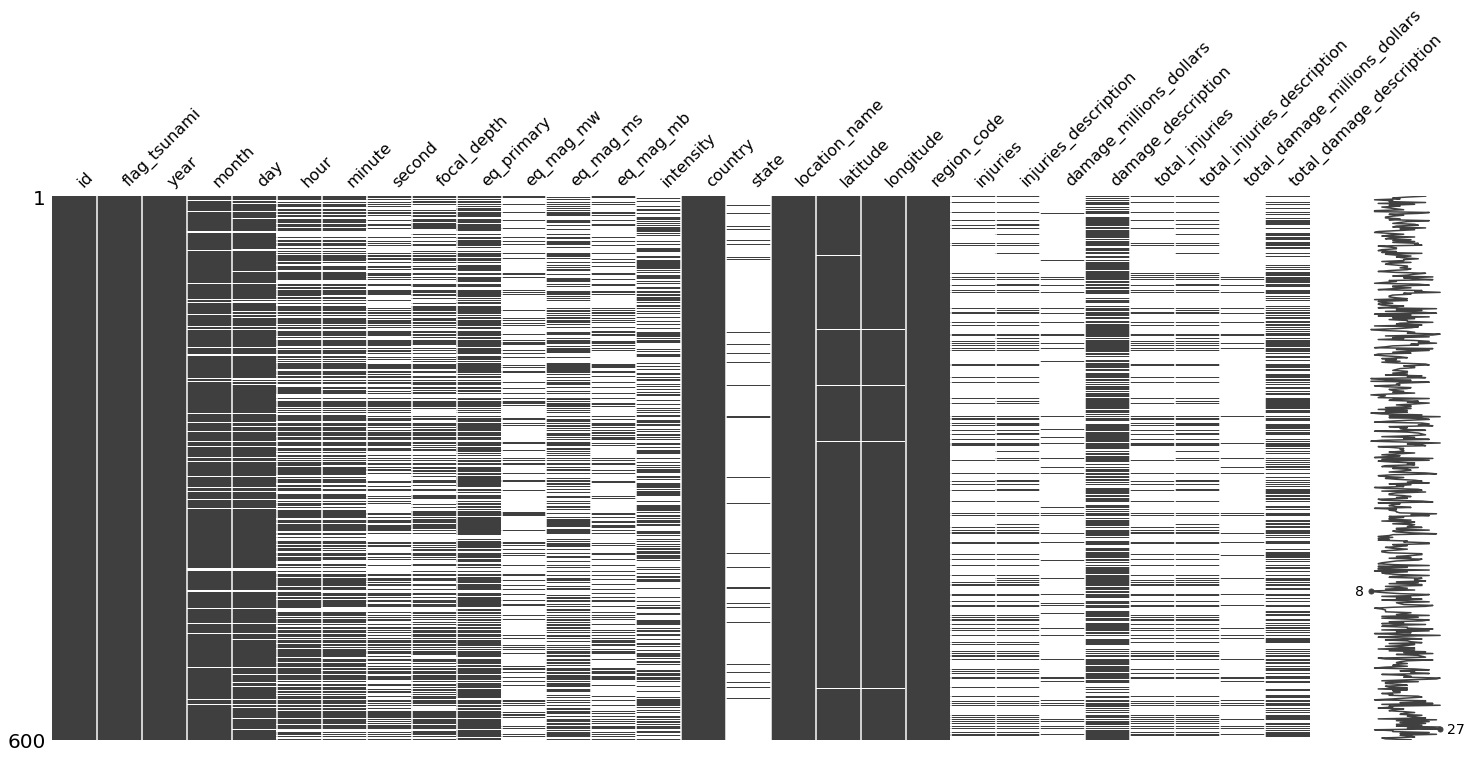

In [10]:
# msno.matrix(dfa.sample())
msno.matrix(dfa.sample(600))
plt.show()

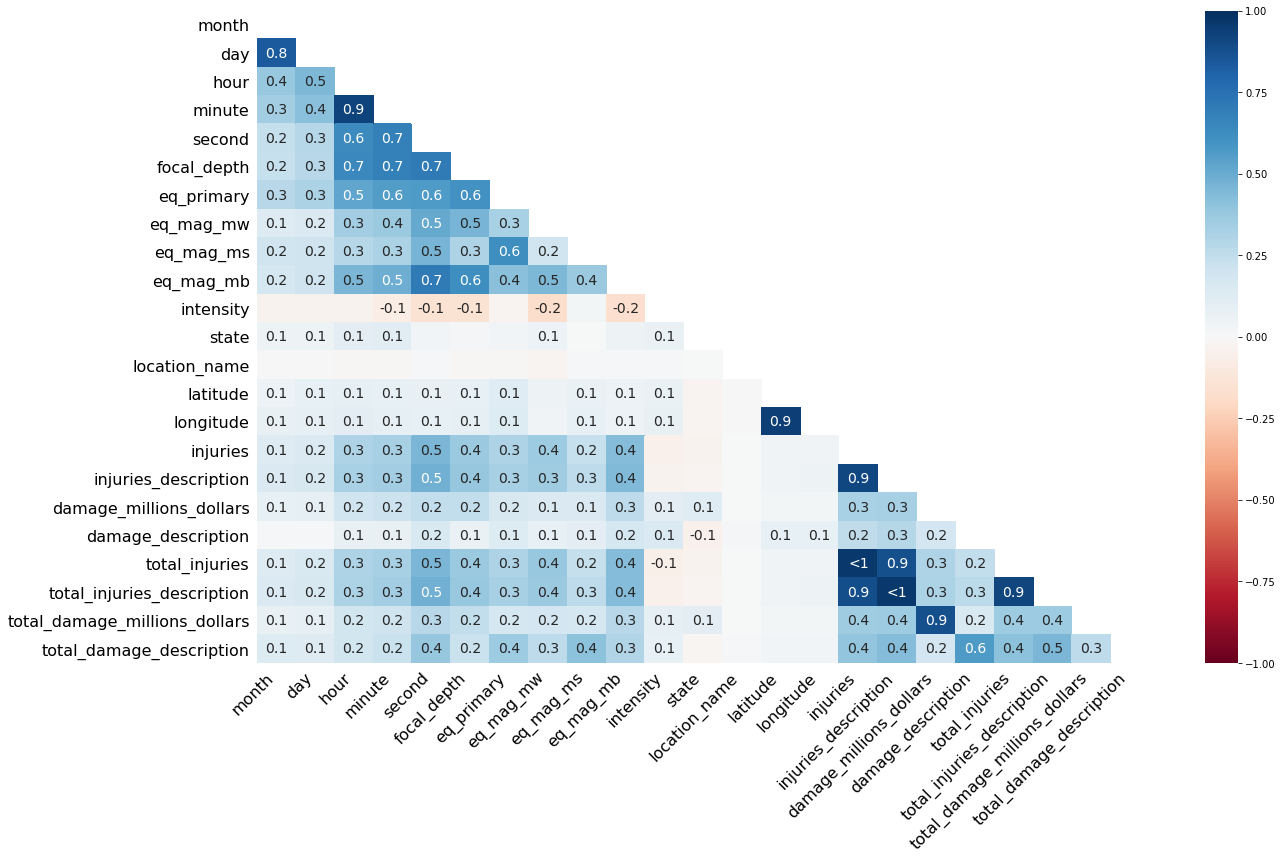

In [11]:
# nullity correlation heatmap 
msno.heatmap(dfa)
plt.show()

In [12]:
time_cols = ['year','month','day','hour','minute','second']

In [13]:
dfb = dfa.copy()

In [14]:
dfb[time_cols] = dfb[time_cols].fillna(0)

In [15]:
# scikit-learn

In [16]:
description_cols = [ 'injuries_description','damage_description', 'total_injuries_description', 'total_damage_description']

In [17]:
from sklearn.impute import SimpleImputer

In [20]:
obji = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='NA')

dfa[['state']] = obji.fit_transform(dfa[['state']])

In [21]:
dfa['damage_description'].value_counts()

2.0    1461
3.0    1309
1.0    1094
4.0     463
Name: damage_description, dtype: int64

In [22]:
dfa[['damage_description', 'damage_millions_dollars']].groupby('damage_description').mean()

,damage_millions_dollars
damage_description,
1.0,0.417211
2.0,3.078840
3.0,13.818806
4.0,3574.998799


In [23]:
category_means = dfa[['damage_description', 'damage_millions_dollars']].groupby('damage_description').mean()

In [26]:
replacement_values = category_means.to_dict()

In [27]:
replacement_values

{'damage_millions_dollars': {1.0: 0.4172105263157895,
  2.0: 3.0788402777777772,
  3.0: 13.818805970149256,
  4.0: 3574.9987991266385}}

In [28]:
replacement_values = category_means.damage_millions_dollars.to_dict()

replacement_values

{1.0: 0.4172105263157895,
 2.0: 3.0788402777777772,
 3.0: 13.818805970149256,
 4.0: 3574.9987991266385}

In [29]:
dfa['damage_description'].isna().sum()

1745

In [30]:
dfa['damage_description']

0       NaN
1       2.0
2       NaN
3       NaN
4       NaN
       ... 
6067    4.0
6068    4.0
6069    4.0
6070    4.0
6071    4.0
Name: damage_description, Length: 6072, dtype: float64

In [32]:
dfa['damage_description'].value_counts()

2.0    1461
3.0    1309
1.0    1094
4.0     463
Name: damage_description, dtype: int64

In [33]:
description_cols

['injuries_description',
 'damage_description',
 'total_injuries_description',
 'total_damage_description']

In [34]:
dfa[description_cols]

,injuries_description,damage_description,total_injuries_description,total_damage_description
0,NaN,NaN,NaN,NaN
1,NaN,2.0,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
6067,1.0,4.0,1.0,4.0
6068,NaN,4.0,NaN,4.0
6069,3.0,4.0,3.0,4.0
6070,2.0,4.0,2.0,4.0


In [36]:
dfa['injuries_description'].value_counts()

1.0    666
3.0    347
2.0    193
4.0    143
Name: injuries_description, dtype: int64

In [37]:
replacement_values

{1.0: 0.4172105263157895,
 2.0: 3.0788402777777772,
 3.0: 13.818805970149256,
 4.0: 3574.9987991266385}

In [38]:
dfa['damage_millions_dollars']

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
        ...  
6067    250.0
6068     25.0
6069     61.0
6070     72.0
6071     25.0
Name: damage_millions_dollars, Length: 6072, dtype: float64

In [40]:
dfa['damage_millions_dollars'].isna().sum()

5594

In [41]:
imputed_values = dfa['damage_description'].map(replacement_values)

In [42]:
imputed_values

0               NaN
1          3.078840
2               NaN
3               NaN
4               NaN
           ...     
6067    3574.998799
6068    3574.998799
6069    3574.998799
6070    3574.998799
6071    3574.998799
Name: damage_description, Length: 6072, dtype: float64

In [50]:
dfa['damage_millions_dollars'] = np.where(dfa['damage_millions_dollars'].isna(), 
                                         imputed_values, dfa['damage_millions_dollars'])

# np.where(if condition is true, replace with x, else keep y)

In [51]:
np.where?


In [53]:
dfa[['damage_millions_dollars']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6072 entries, 0 to 6071
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   damage_millions_dollars  4327 non-null   float64
dtypes: float64(1)
memory usage: 47.6 KB


In [72]:
replacement_values[math.nan] = -1
replacement_values['0'] = 0

In [63]:
del replacement_values[np.NaN]

In [73]:
replacement_values

{1.0: 0.4172105263157895,
 2.0: 3.0788402777777772,
 3.0: 13.818805970149256,
 4.0: 3574.9987991266385,
 '0': 0,
 nan: -1,
 nan: -1}

In [74]:
dfa['damage_millions_dollars'] = np.where(dfa['damage_millions_dollars'].isnull(), 
                                         imputed_values, dfa['damage_millions_dollars'])

# np.where(if condition is true, replace with x, else keep y)

In [75]:
dfa[['damage_millions_dollars']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6072 entries, 0 to 6071
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   damage_millions_dollars  4327 non-null   float64
dtypes: float64(1)
memory usage: 47.6 KB


In [77]:
type(dfa['damage_millions_dollars'][0])

numpy.float64

In [79]:
dfa['damage_millions_dollars'][0] == math.nan

False

In [80]:
x = dfa['damage_millions_dollars'][0]

In [81]:
replacement_values

{1.0: 0.4172105263157895,
 2.0: 3.0788402777777772,
 3.0: 13.818805970149256,
 4.0: 3574.9987991266385,
 '0': 0,
 nan: -1,
 nan: -1}

In [82]:
del replacement_values[np.nan]

In [84]:
del replacement_values[math.nan]

In [85]:
replacement_values[x] = -1

In [93]:
dfa['damage_millions_dollars'] = np.where(dfa['damage_millions_dollars'].isna(), 
                                         imputed_values, dfa['damage_millions_dollars'])

# np.where(if condition is true, replace with x, else keep y)

In [94]:
dfa['damage_millions_dollars']

0             NaN
1         3.07884
2             NaN
3             NaN
4             NaN
          ...    
6067    250.00000
6068     25.00000
6069     61.00000
6070     72.00000
6071     25.00000
Name: damage_millions_dollars, Length: 6072, dtype: float64

In [90]:
obji = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0)

dfa[['damage_description']] = obji.fit_transform(dfa[['damage_description']])

In [92]:
replacement_values[0] = -1

In [95]:
dfa['damage_description'].isna().sum()

0